# ICS 434: DATA SCIENCE FUNDAMENTALS

## Kernel Density Estimation Bandwidth

---

In [1]:
import numpy as np
import scipy  as sp
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### Using KDE on Simulated Data 

* This example explores the KDE on data generated from a Gaussian with the following parameters:
  * $X \sim \mathcal{N}(0, 0.5)$

1. Generate 100 points from the distribution above
2. Build a histogram for the data
3. Compare the KDE generated plot to the histogram


In [3]:
x_mean, x_scale = 0, 0.5
x = np.random.normal(x_mean, x_scale, 100)

counts = np.histogram(x, bins=np.arange(-3, 3, 0.2))
counts

(array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  4,  4,  7, 11,  8, 14, 17, 16,
         6,  4,  4,  2,  1,  1,  0,  0,  0,  0,  0,  0]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]))

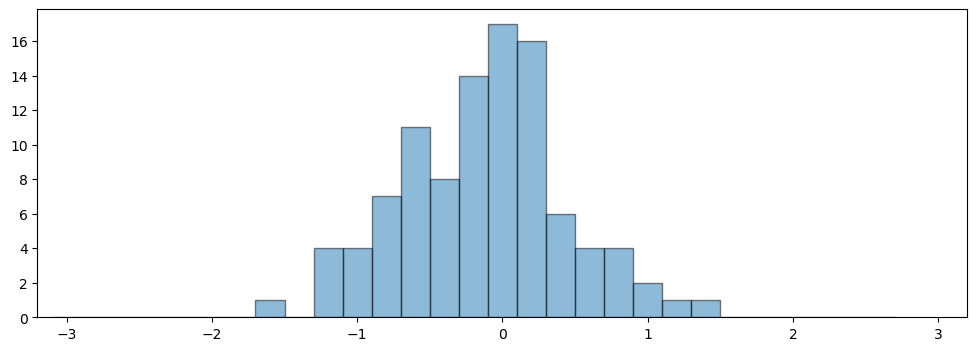

In [4]:
plt.figure(figsize=(12, 4))

fig = plt.bar(counts[1][:-1], counts[0], edgecolor='k', alpha=0.5, width=0.2)
plt.xlim(-3.2, 3.2);

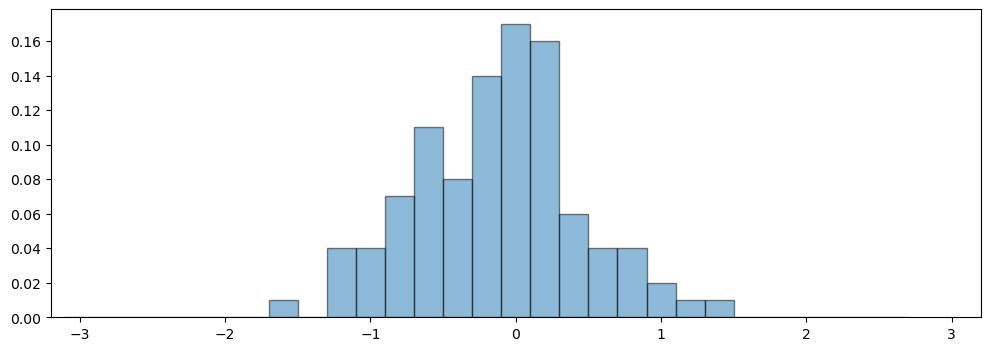

In [5]:
plt.figure(figsize=(12, 4))

fig = plt.bar(counts[1][:-1], counts[0]/sum(counts[0]), edgecolor='k', alpha=0.5, width=0.2)
plt.xlim(-3.2, 3.2);

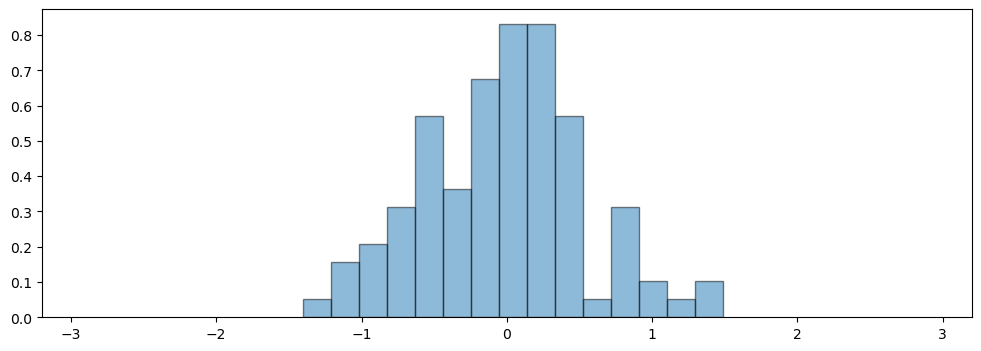

In [6]:
plt.figure(figsize=(12, 4))

fig = plt.hist(x, edgecolor='k', alpha=0.5, bins=15, density=True)
plt.xlim(-3.2, 3.2);

### Computing the KDE of a Dataset

__```Algorithm```__:
```
For each value along the x-axis:
    For each data sample for which pdf(x) is not null
        y = sum of all such pdf
```       

* How many times will we compute the `pdf` function on a value $x$?
* Alternatively, how many times will we count the number of overlapping (tophat) kernels?

How can we speed up the `KDE`? 
  - Choose a kernel that is easier to compute
  - Using an appropriate data structure for finding nearest neighbors to a point $x$


In [7]:
x_values = np.arange(-3, 3, 0.1)

# compute the KDE
kde = sp.stats.gaussian_kde(x, bw_method=0.8)

# estimate kernel density for the support (x-axis)
x_densities = kde.evaluate(x_values)

print(x[0:10])
print("*" * 80)
print(x_densities[0:10])

[ 0.02344409 -0.50051282 -0.43434851  0.72688032  0.22634226  0.35058012
 -0.4132321   0.20474772 -1.14139218  0.21705347]
********************************************************************************
[2.07913166e-05 4.66691315e-05 1.00349236e-04 2.06887138e-04
 4.09377141e-04 7.78313333e-04 1.42339759e-03 2.50704741e-03
 4.25797174e-03 6.98221290e-03]


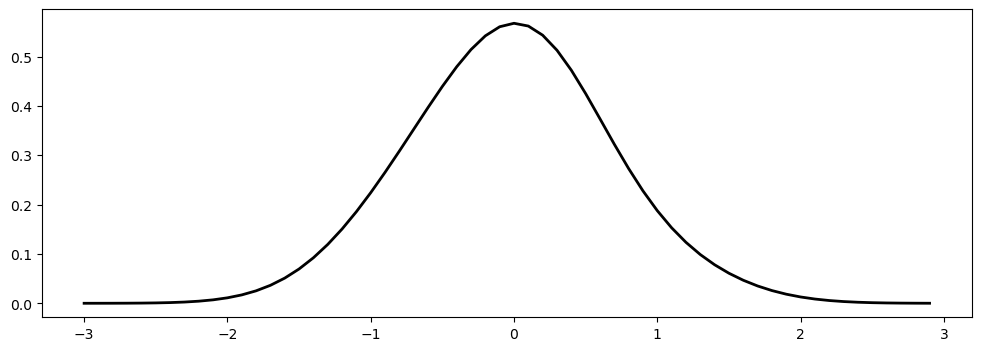

In [8]:
fig = plt.figure(figsize=(12, 4))
plt.plot(x_values, x_densities, lw=2, color='black');

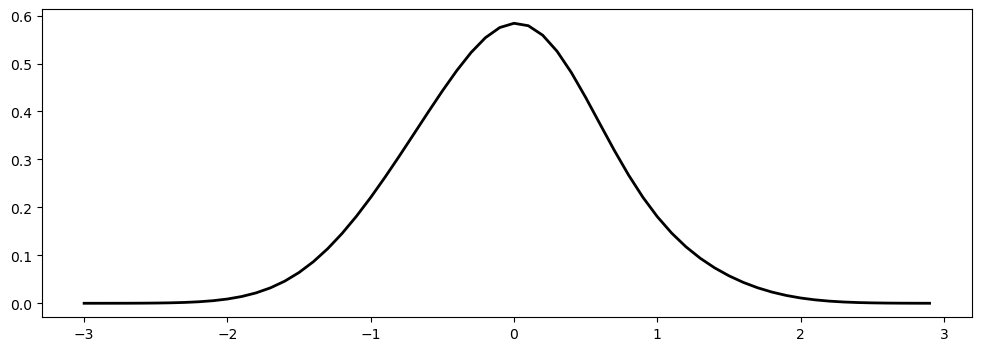

In [29]:
x_values = np.arange(-3, 3, 0.1)

# compute the KDE
kde = sp.stats.gaussian_kde(x, bw_method=0.75)

# estimate kernel density for the support (x-axis)
x_densities = kde.evaluate(x_values)

fig = plt.figure(figsize=(12, 4))
plt.plot(x_values, x_densities, lw=2, color='black');

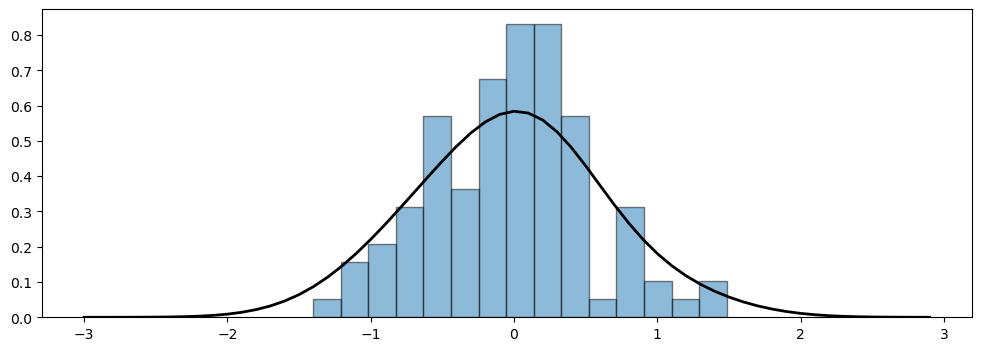

In [30]:
fig = plt.figure(figsize=(12, 4))
plt.plot(x_values, x_densities, lw=2, color='black')
fig = plt.hist(x, edgecolor='k', alpha=0.5, bins=15, density=True)

In [28]:
x_mean, x_scale =  0, 0.5
y_mean, y_scale =  9, 1

In [12]:
x_data = np.random.normal(x_mean, x_scale, 100)
y_data = np.random.normal(y_mean, y_scale, 100)
print("The first 10 samples from the first gaussian are:\n %s \n" % x_data[0:10])
print("The first 10 samples from the second gaussian are:\n %s \n" % y_data[0:10])

The first 10 samples from the first gaussian are:
 [-0.35172405 -0.38620077 -0.59827584  0.21855977  0.74683955 -0.6117574
 -0.40796544  0.27401182 -0.07599244  0.01916873] 

The first 10 samples from the second gaussian are:
 [ 7.50891395  7.83848424  9.41435431  9.10332426  9.34153991 10.34101072
  9.21851145  9.66189429  8.72200728  8.83313829] 



In [13]:
# np.array([1,2,3]) + np.array([1,2,3]) = np.array([2,4,6])
# np.array([1,2,3]) + 5  =>  np.array([1,2,3]) + np.array([5,5,5]) 
# = np.array([6,7,8])

In [14]:
all_data = np.concatenate([x_data, y_data])  # list_1 + list_2  
print(len(all_data))

200


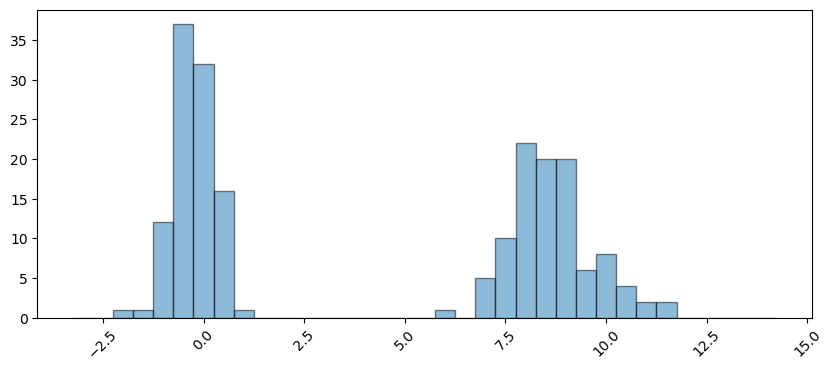

In [15]:
counts = np.histogram(all_data, bins=np.arange(-3, 15, 0.5))

plt.figure(figsize=(10, 4))
fig = plt.bar(counts[1][:-1], counts[0], alpha=.5, edgecolor="k", width=0.5)
_ = plt.xticks(rotation=45)

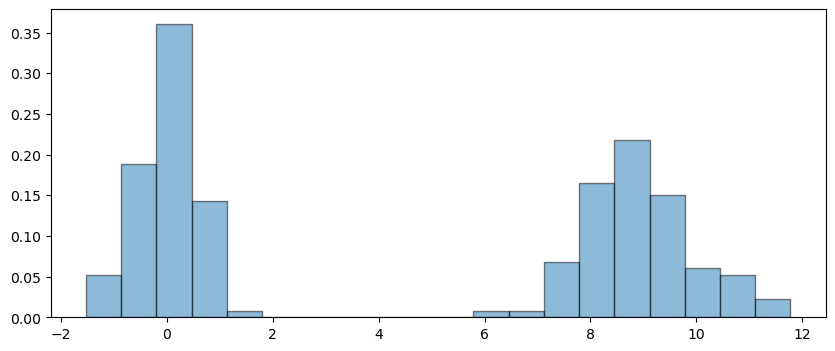

In [16]:
plt.figure(figsize=(10, 4))
fig = plt.hist(all_data, bins=20, edgecolor="k", linewidth=1, density=True, alpha=0.5)

In [17]:
x_values = np.arange(-10, 20, 0.25)

# compute the KDE
kde = sp.stats.gaussian_kde(all_data, bw_method=0.16)

# estimate kernel density for the support (x-axis)
densities = kde.evaluate(x_values)

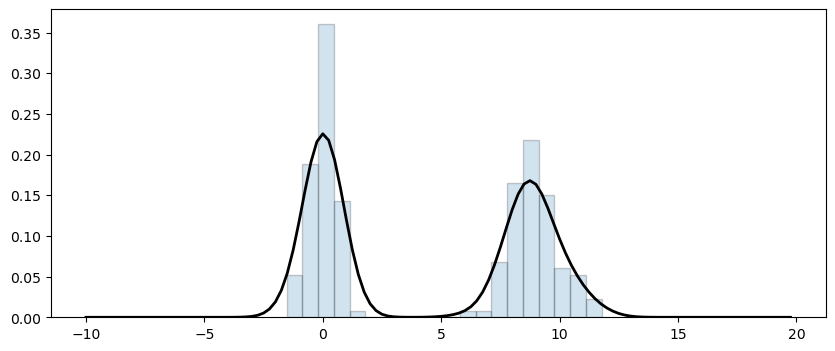

In [18]:
fig = plt.figure(figsize=(10, 4))
plt.hist(all_data, bins=20, edgecolor="k", linewidth=1, density=True, alpha=0.2)
plt.plot(x_values, densities, lw=2, color='black');

### Optimal Kernel Width

* Recall that the kernel is defined by its width
  * Often called `bandwidth` in programming libraries
  * This applies regardless of which kernel we choose (ex. tophat, exponential, Gaussian, etc.)

* How do we define the appropriate kernel width?
   * In the previous example, we set `bw` to `0.16`. Why did we choose this value?


### Optimal Kernel Width

* Recall that the kernel is defined by its width
  * Often called `bandwidth` in programming libraries
  * This applies regardless of which kernel we choose (ex. tophat, exponential, Gaussian, etc.)

* How do we define the appropriate kernel width?
   * In the previous example, we set `bw` to `0.16`


### Optimal Kernel Width -- Cont'd

* Recall that the scale determines the contributions of neighboring points
  * High width (large variance) accounts for distant neighbors
  * Small width (small variance) discounts the contribution of distant neighbors


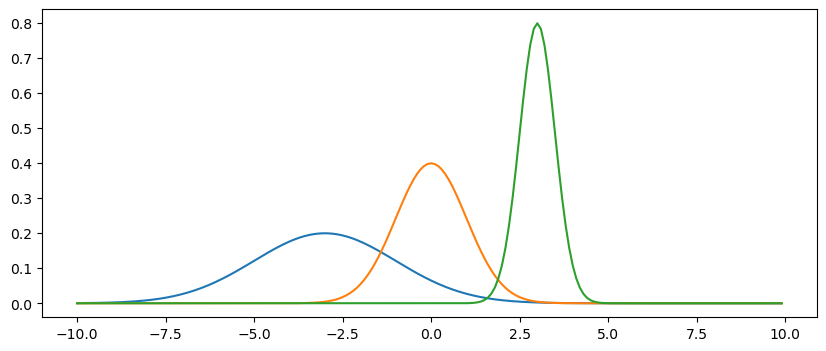

In [19]:
fig = plt.figure(figsize=(10, 4))
kernel_1 = [sp.stats.norm.pdf(x, -3, 2) for x in np.arange(-10, 10, 0.1)]
kernel_2 = [sp.stats.norm.pdf(x, 0, 1) for x in np.arange(-10, 10, 0.1)]
kernel_3 = [sp.stats.norm.pdf(x, 3, 0.5) for x in np.arange(-10, 10, 0.1)]

plt.plot(np.arange(-10,10, 0.1), kernel_1)
plt.plot(np.arange(-10,10, 0.1), kernel_2)
plt.plot(np.arange(-10,10, 0.1), kernel_3);

### Optimal Kernel Width -- Cont'd

* It is essential to choose the most appropriate bandwidth as a value that is too small or too large is not useful

* If bandwidth is too small, the KDE is said to under-smooth
  - Contributions to nearby points is small, which leads to a jagged curve
  
* This also referred to in machine learning as overfitting

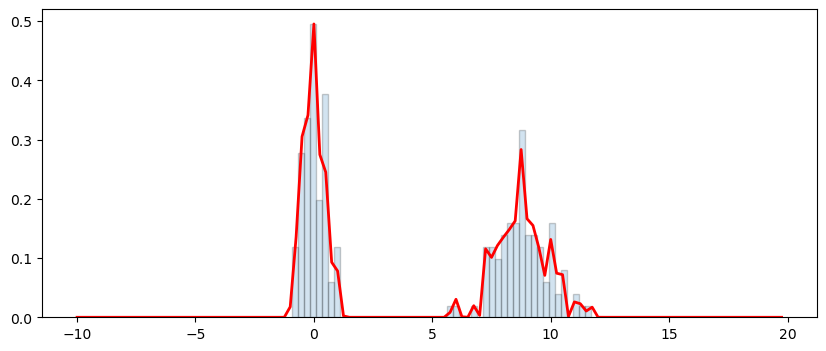

In [20]:
kde = sp.stats.gaussian_kde(all_data, bw_method=0.02)
densities = kde.evaluate(x_values)

fig = plt.figure(figsize=(10, 4))
plt.hist(all_data, bins=50, density=True, edgecolor="k", linewidth=1, alpha=0.2)
plt.plot(x_values, densities, lw=2, color='r');

### Optimal Kernel Width -- Cont'd

* If the bandwidth is too large, the KDE is said to over-smooth

  * Contributions of nearby points is large, which leads to a flattened curve
  
* This also referred to in machine learning as underfitting 

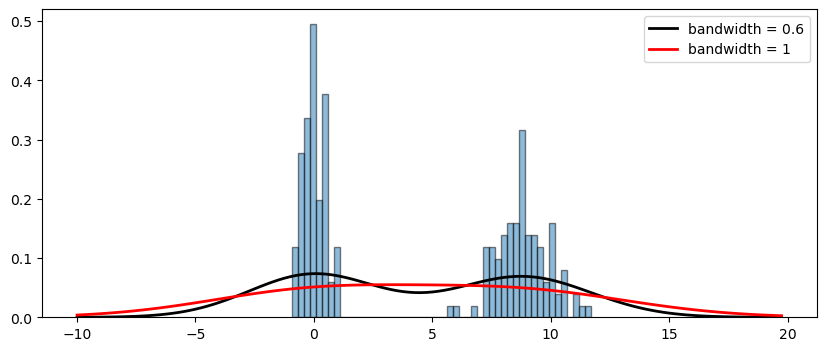

In [21]:
kde = sp.stats.gaussian_kde(all_data, bw_method=0.6)
densities = kde.evaluate(x_values)

kde = sp.stats.gaussian_kde(all_data, bw_method=1)
densities_2 = kde.evaluate(x_values)

plt.figure(figsize=(10, 4))
plt.hist(all_data, bins=50, density=True, edgecolor="k", linewidth=1, alpha=0.5)
plt.plot(x_values, densities, lw=2, color='black', label="bandwidth = 0.6")
plt.plot(x_values, densities_2, lw=2, color='red', label="bandwidth = 1")
plt.legend();

### How do you choose the correct value of the bandwidth?

Recall that we are trying to estimate a probability density for the population in the presence of a small dataset

*  We want the bandwidth to be as close to the population pdf as possible

* We want a bandwidth that is narrow enough to retain all relevant details, but wide enough so that the resulting curve is not too wiggly
  * This is a recurring problem in data analysis; __Bias-Variance__ __Tradeoff__

### How do you choose the correct value of the bandwidth?

Recall that we are trying to estimate a probability density for the population in the presence of a small dataset

* We want a bandwidth that is narrow enough to retain all relevant details, but wide enough so that the resulting curve is not too wiggly
  * This is a recurring problem in data analysis; __Bias-Variance__ __Tradeoff__

### Illustrating the Bias-Variance Tradeoff

* To illustrate, we are going to generate multiple datasets from a population containing two distributions
  - $X \sim \mathcal{N}(0, 1)$
  - $Y \sim \mathcal{N}(9, 1)$
  
* All the dataset come from the same population, so we expect their estimated probability densities to be as close as possible

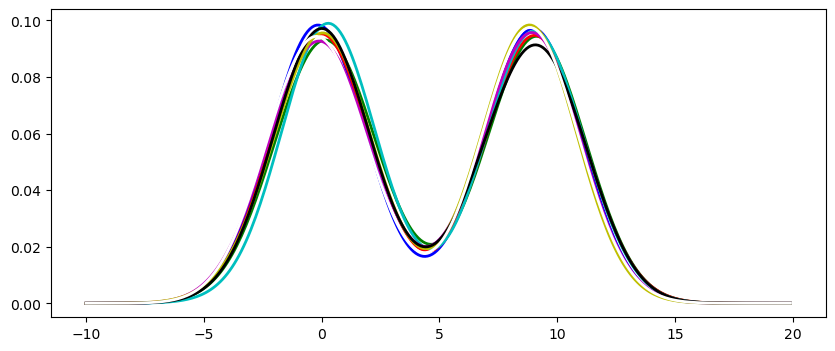

In [22]:
plt.figure(figsize=(10, 4))
x_values = np.arange(-10, 20, 0.1)
x_mean, x_scale = 0, 1
y_mean, y_scale = 9, 1

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 50)
    y_data = np.random.normal(y_mean, y_scale, 50)
    data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(data, bw_method=0.4)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])

### Model Variance


* Variance in this context is the variability that is due to small fluctuations in the data.

 * Model focuses too much on the data and does not generalize on the data it hasn’t seen before.

* The model with a high variance pays close attention to the actual data and does not generalize to data it hasn't seen before. As a result, such models perform very well on data used to learn the model (training) but have high error rates on new (test) data.

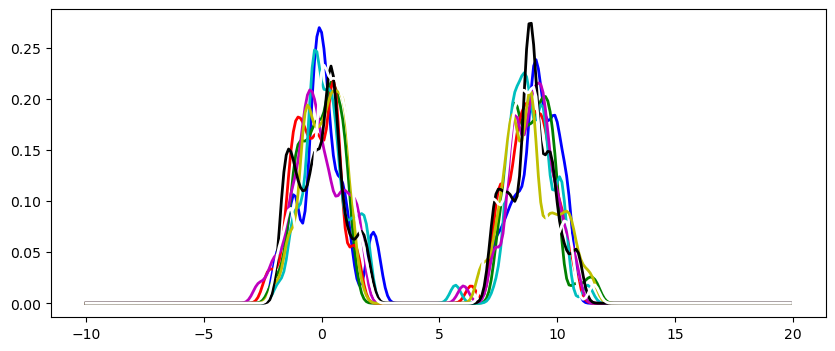

In [23]:
plt.figure(figsize=(10, 4))
x_values = np.arange(-10, 20, 0.1)
x_mean, x_scale = 0, 1
y_mean, y_scale = 9, 1

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 50)
    y_data = np.random.normal(y_mean, y_scale, 50)
    data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(data, bw_method=0.05)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])

### Model Bias

* Bias in this context is the difference between the predicted and actual densities. 
  * High-bias models oversimplify the estimated density.
  * Data contribution to the model is minimized. So, regardless of what the data says, the model will still look relatively the same.

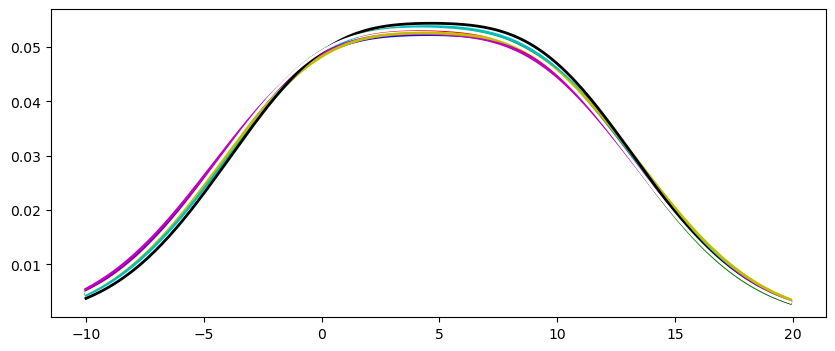

In [24]:
plt.figure(figsize=(10, 4))
x_values = np.arange(-10, 20, 0.1)
x_mean, x_scale = 0, 1
y_mean, y_scale = 9, 1

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 50)
    y_data = np.random.normal(y_mean, y_scale, 50)
    data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(data, bw_method=1)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])

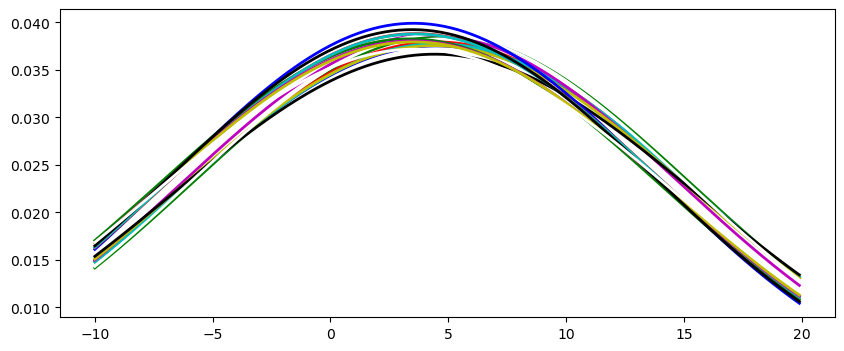

In [25]:
plt.figure(figsize=(10 ,4))
x_values = np.arange(-10, 20, 0.1)
x_mean, x_scale = 0, 1
y_mean, y_scale = 9, 1

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 50)
    y_data = np.random.normal(y_mean, y_scale, 50)
    data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(data, bw_method=2)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])
    

x_mean, x_scale = -1, 1
y_mean, y_scale = 8, 1

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 50)
    y_data = np.random.normal(y_mean, y_scale, 50)
    data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(data, bw_method=2)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])

### Model Variance and Bias Revisited 

* Based on the above, we can conclude that:
  * Models with large variance, as the name implies, tend to generate a greater variance in their predictions for inferred values
  * Models with large bias tend to generate greater *constant* biased model that do not fit the data well

* What we want is to find the bandwidth that best fits our data
  * Yields a model with minimal bias and variance 
* We can assure that the bandwidth fits the data by leaving some data out and finding the bandwidth that maximizes our likelihood

* Interactive practical next session

### Model Variance and Bias Revisited 

* Based on the above, we can conclude that:
  * Models with large variance, as the name implies, tend to generate a greater variance in their predictions for inferred values
  * Models with large bias tend to generate greater *constant* biased model that do not fit the data well

* What we want is to find the bandwidth that best fits our data
  * Yields a model with minimal bias and variance 
* We can assure that the bandwidth fits the data by leaving some data out and finding the bandwidth that maximizes our likelihood

### Selecting the Kernel Bandwidth -- Theoretical

* Theoretical versus empirical solutions to tackle this problem

* Theoretical: optimal bandwidth is estimated using an equation
  * Ex. Silverman's rule, which is included in scipy's `gaussian_kde` 

$$
\large
h = \left(\frac{4\sigma^5}{3n}\right)^{\frac{1}{5}}
$$

  - This is the typical approach in statistical analysis
  - Very fast: plug the number into an equation and you are done!

### Selecting the Kernel Bandwidth -- Theoretical

* Theoretical versus empirical solutions to tackle this problem

* Theoretical: optimal bandwidth is estimated using an equation
  * Ex. Silverman's rule, which is included in scipy's `gaussian_kde` 

$$
\large
h = 0.9\min\left(\sigma,\frac{IQR}{1.34}\right)n^{-\frac{1}{5}}
$$

  - This is the typical approach in statistical analysis
  - Very fast: plug the number into an equation and you are done!

### Selecting the Kernel Bandwidth -- Empirical

* An empirical approach that relies on the data

  * Choose a subset of the data from the KDE and see how well the KDE fits the remaining data 
  
  * Iterate until you find the best KDE
  
    * This approach is called cross-validation

* This approach will be covered in detail in the machine learning lectures later

### Selecting the Kernel Bandwidth -- Practical

* For KDE, I have found it sufficient to choose the `bandwidth` parameter as suggested by the default statistical method and to manually tweak the suggested value to obtain the most intuitive visualization of point distributions.

* Here, we can choose the `bw` which satisfies our prior knowledge of the data.

  * We know the data comes from two distributions.

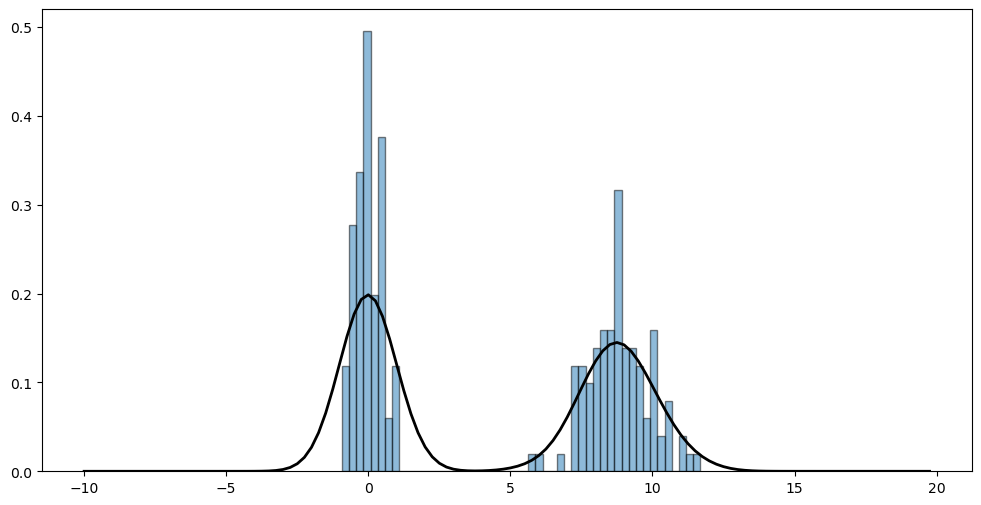

In [28]:
x_values = np.arange(-10, 20, 0.25)
kde = sp.stats.gaussian_kde(all_data, bw_method=0.2)
densities = kde.evaluate(x_values)

plt.figure(figsize=(12, 6))
plt.hist(all_data, bins=50, edgecolor="k", linewidth=1, density=True, alpha=0.5)
plt.plot(x_values, densities, lw=2, color='black');